In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns

#### Importing accel data

In [2]:
import pandas as pd
import glob

path = r'C:/Users/ABC/Desktop/wisdm-dataset/wisdm-dataset/raw/phone/accel'
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    column_names = ['user-id','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
    df = pd.read_csv(filename, header = None, names = column_names)
    li.append(df)

data_accel = pd.concat(li, axis=0, ignore_index=True)

In [3]:
data_accel.head()

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,1600,A,252207666810782,-0.364761,8.793503,1.0550842;
1,1600,A,252207717164786,-0.879730,9.768784,1.0169983;
2,1600,A,252207767518790,2.001495,11.109070,2.619156;
3,1600,A,252207817872794,0.450623,12.651642,0.18455505;
4,1600,A,252207868226798,-2.164352,13.928436,-4.4224854;


In [4]:
data_accel.shape

(4804403, 6)

##### Loading gyro sensor data

In [5]:
path = r'C:/Users/ABC/Desktop/wisdm-dataset/wisdm-dataset/raw/phone/gyro'
all_files = glob.glob(path + "/*.txt")

li1 = []

for filename in all_files:
    column_names = ['user-id','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
    df1 = pd.read_csv(filename, header = None, names = column_names)
    li1.append(df1)

data_gyro = pd.concat(li1, axis=0, ignore_index=True)

In [6]:
data_gyro.head()

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,1600,A,252207918580802,-0.853210,0.297226,0.8901825;
1,1600,A,252207968934806,-0.875137,0.015472,0.16223145;
2,1600,A,252208019288809,-0.720169,0.388489,-0.28401184;
3,1600,A,252208069642813,-0.571640,1.227402,-0.2416687;
4,1600,A,252208119996817,-0.380493,1.202835,-0.21313477;


In [7]:
data_gyro.shape

(3608635, 6)

##### Data Cleaning

In [8]:
def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan

In [9]:
data_accel['z-axis'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
data_accel['z-axis'] = data_accel['z-axis'].apply(convert_to_float)
data_accel.dropna(axis=0, how='any', inplace=True)
data_accel.dtypes

user-id        int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

In [10]:
data_gyro['z-axis'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
data_gyro['z-axis'] = data_accel['z-axis'].apply(convert_to_float)
data_gyro.dropna(axis=0, how='any', inplace=True)
data_gyro.dtypes

user-id        int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

##### data Visualization

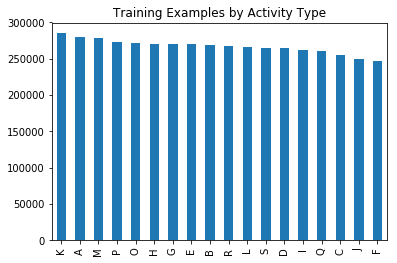

In [11]:
data_accel['activity'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()

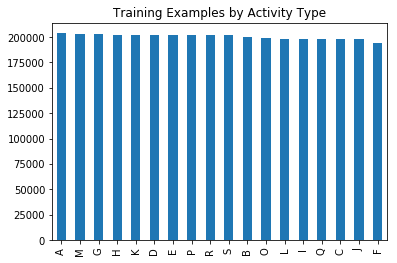

In [12]:
data_gyro['activity'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')
plt.show()

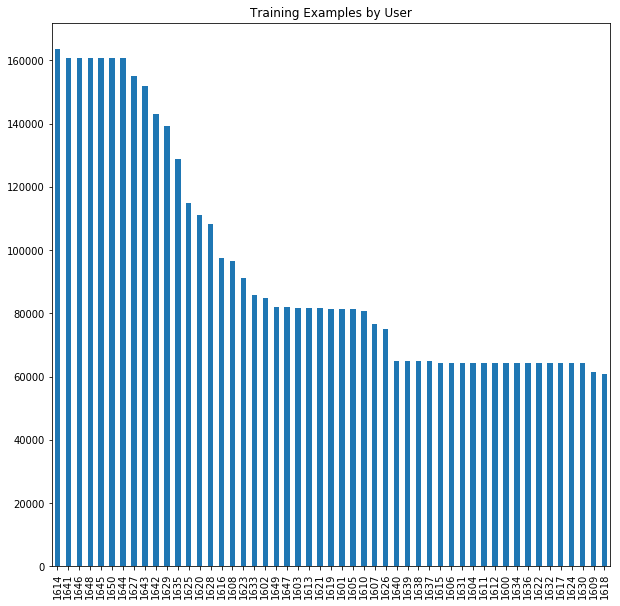

In [13]:
plt.figure(figsize=(10,10))
data_accel['user-id'].value_counts().plot(kind='bar',
                                  title='Training Examples by User')
plt.show()

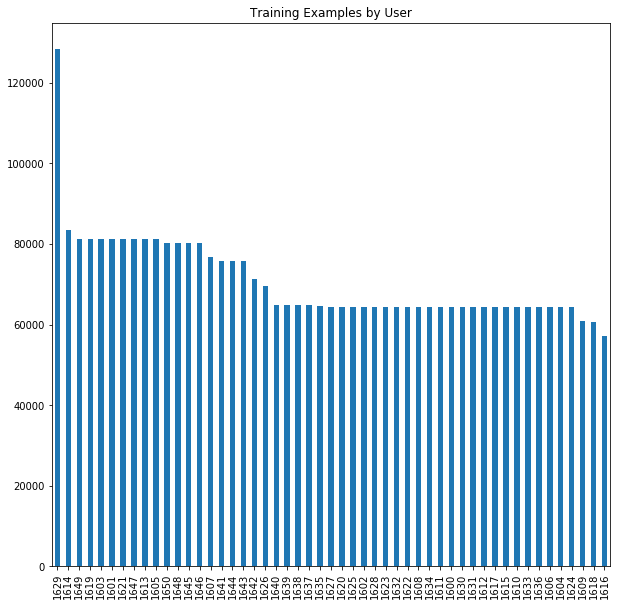

In [14]:
plt.figure(figsize=(10,10))
data_gyro['user-id'].value_counts().plot(kind='bar',
                                  title='Training Examples by User')
plt.show()

In [15]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

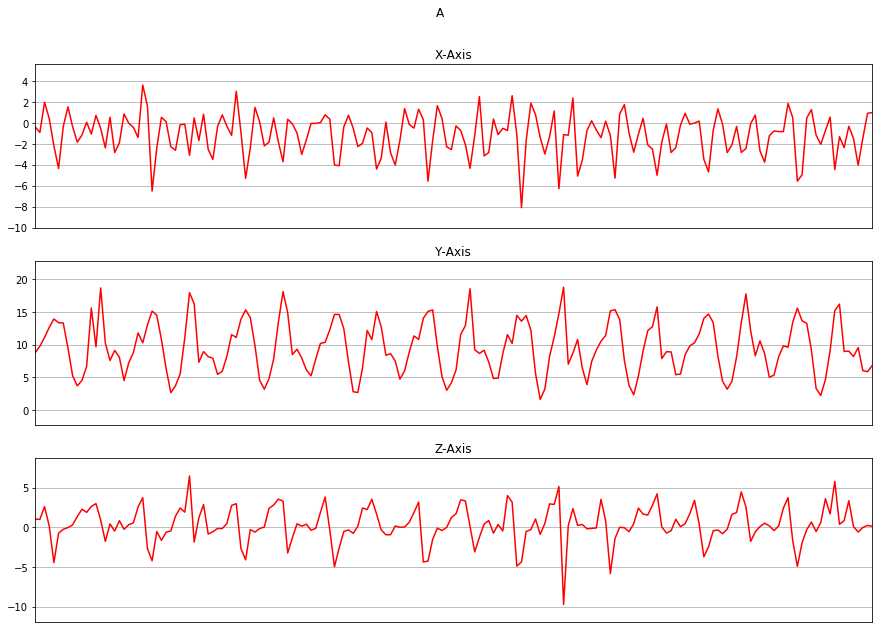

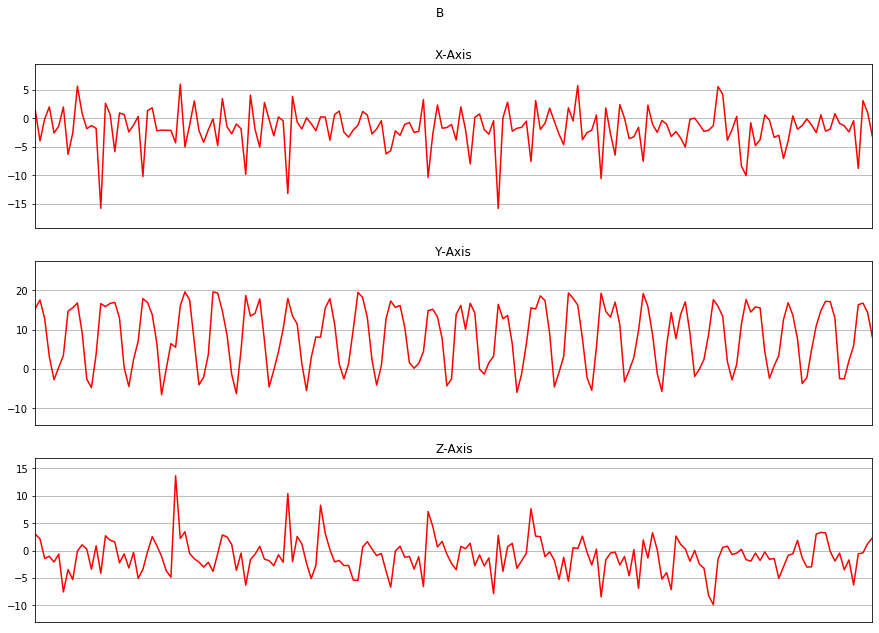

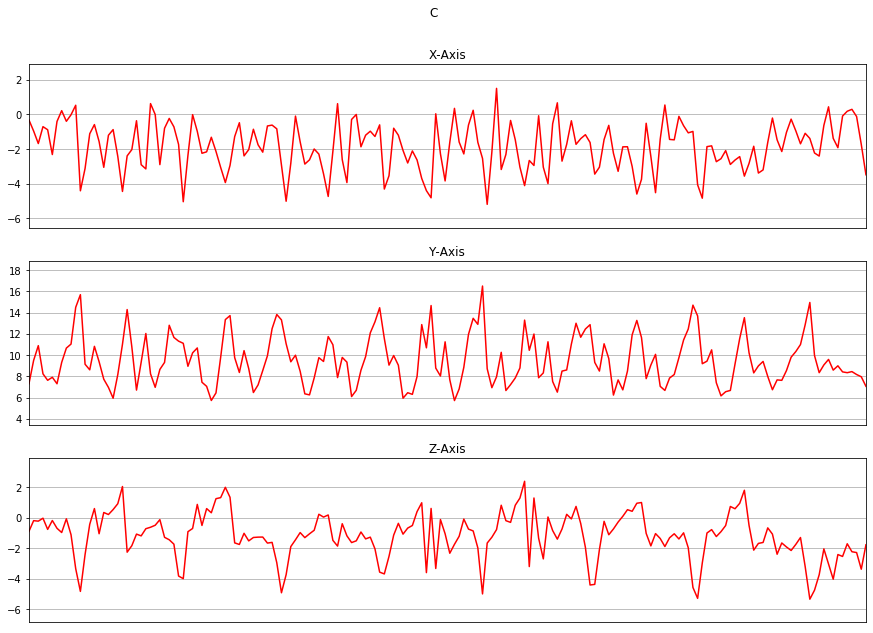

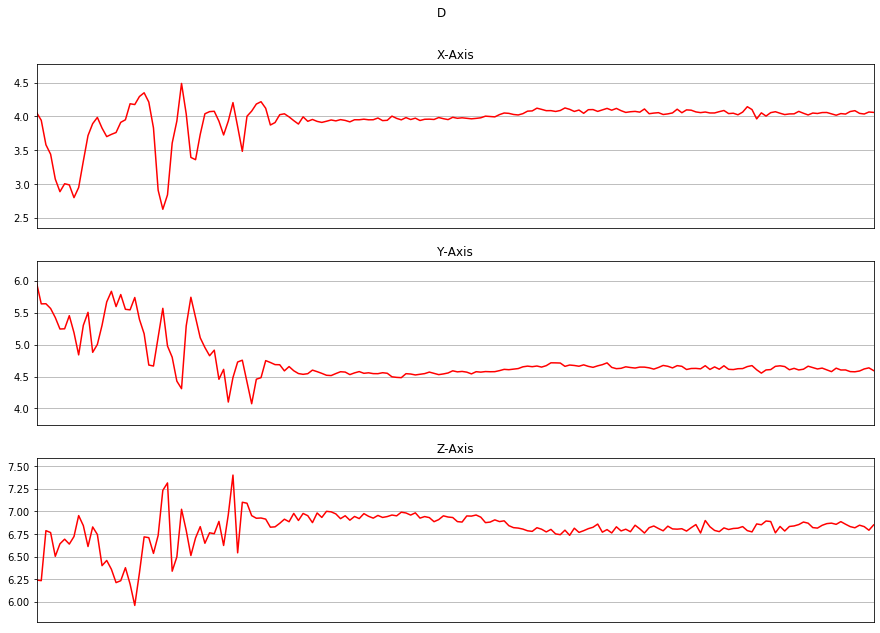

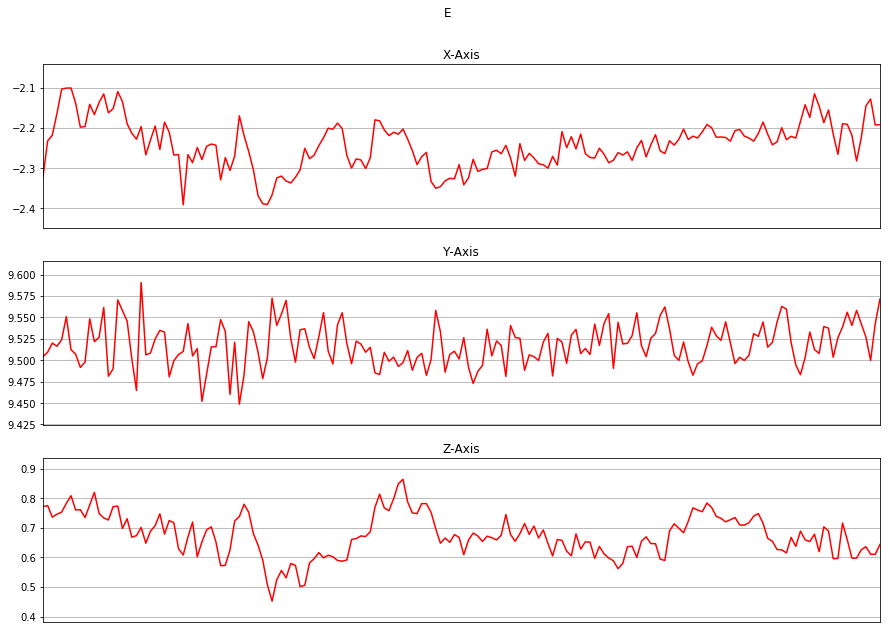

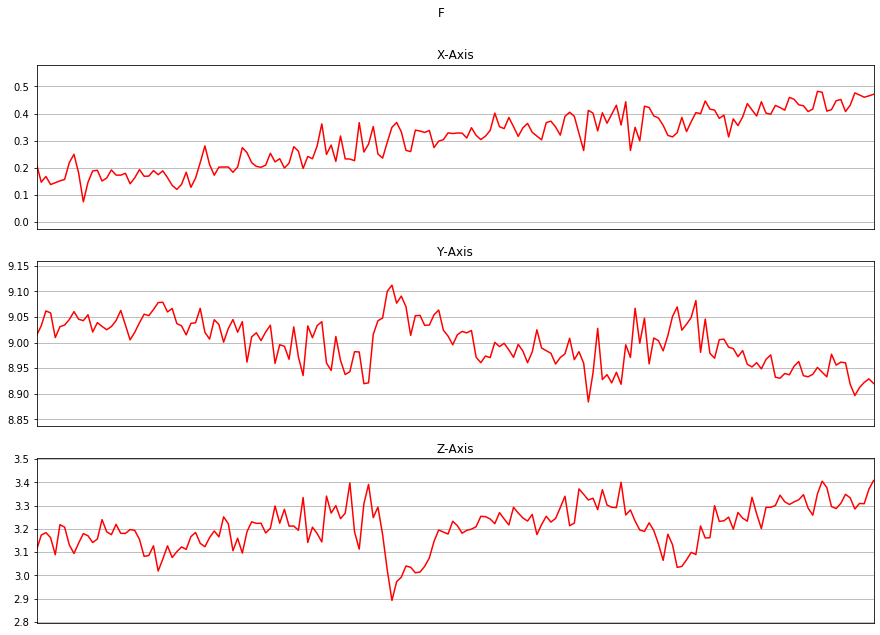

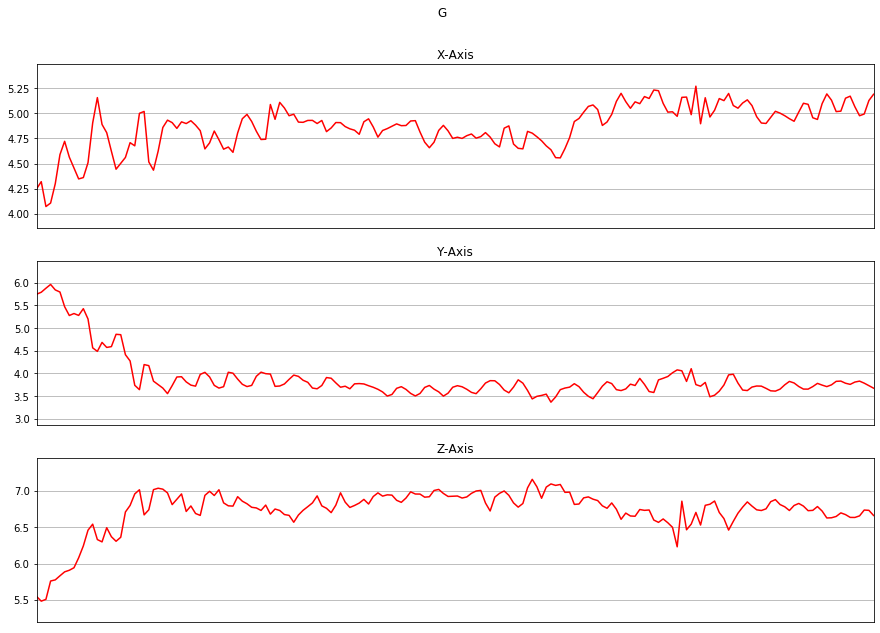

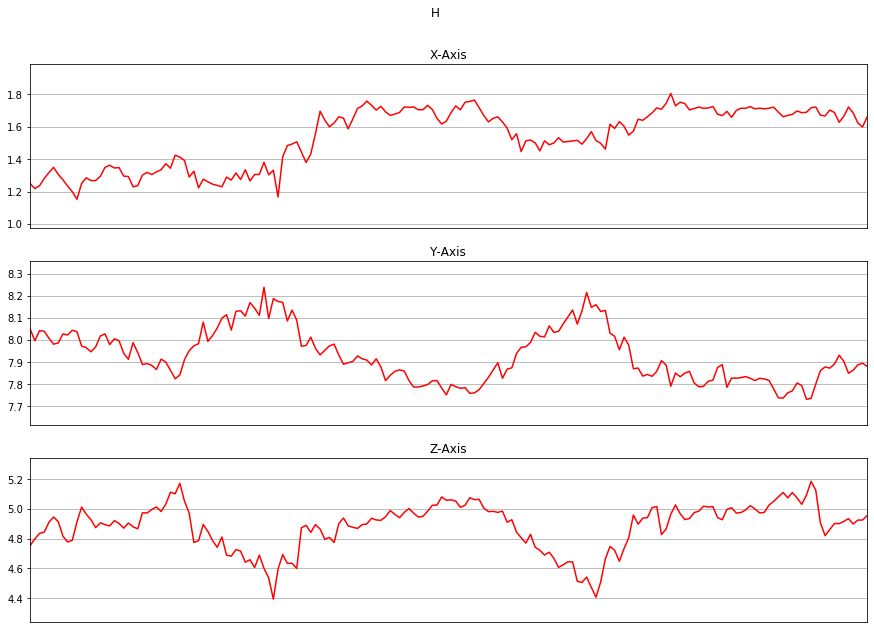

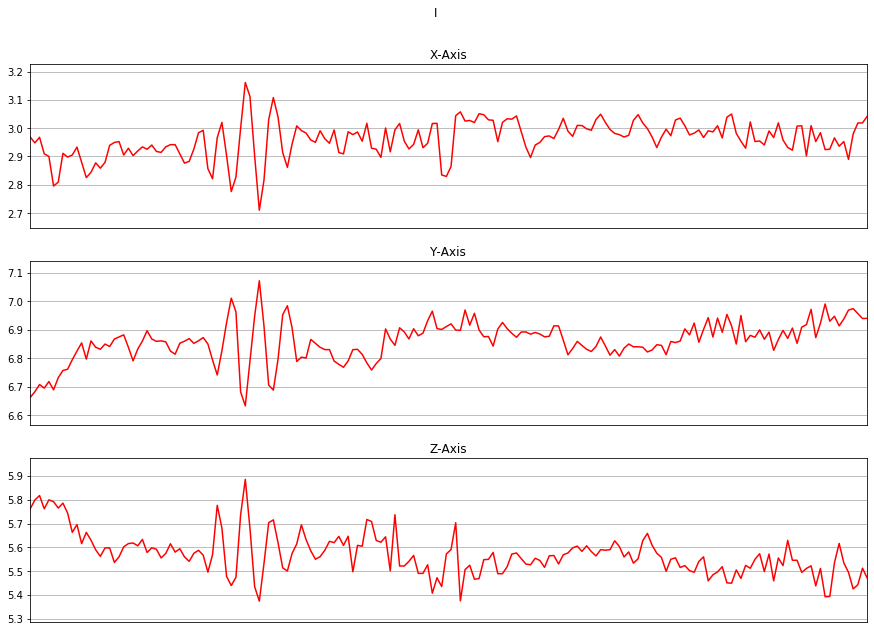

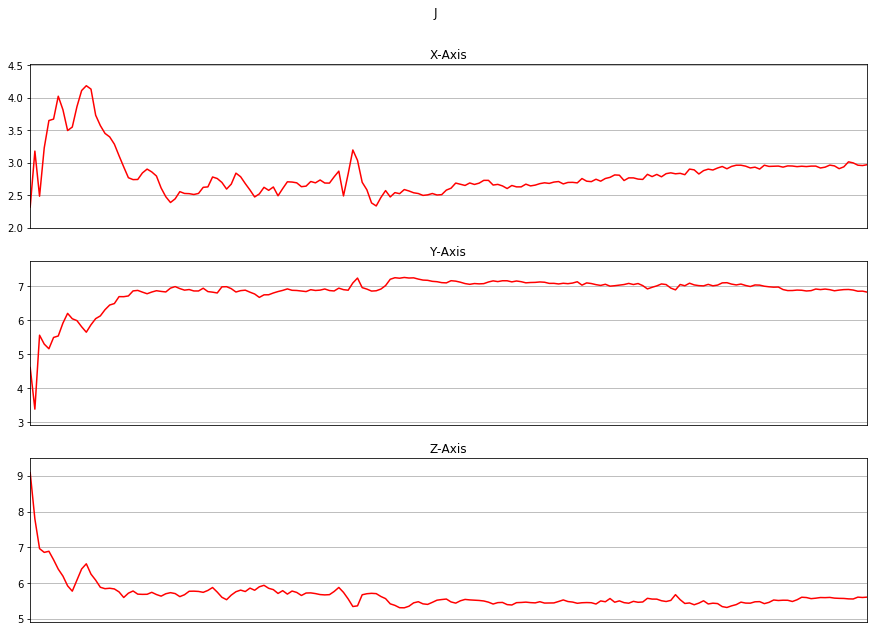

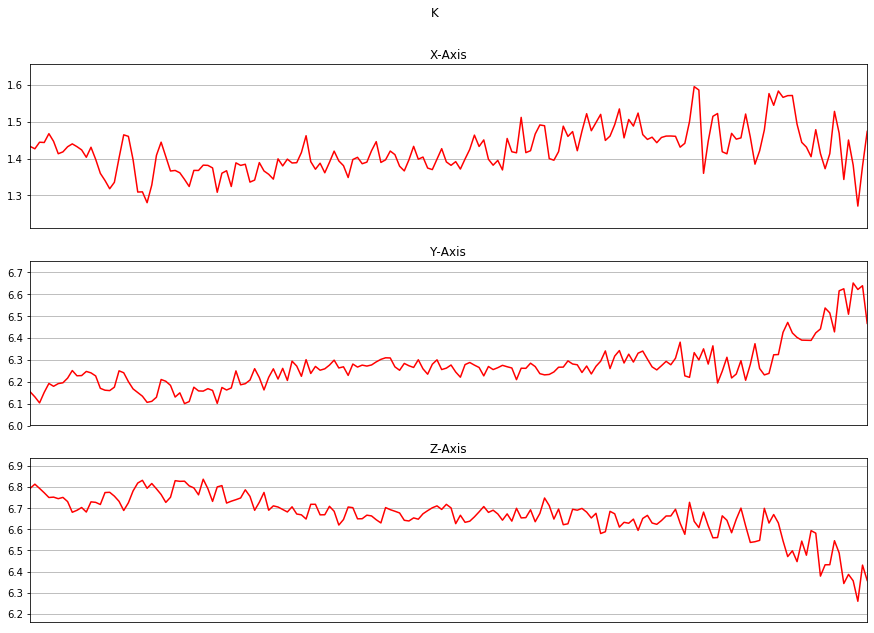

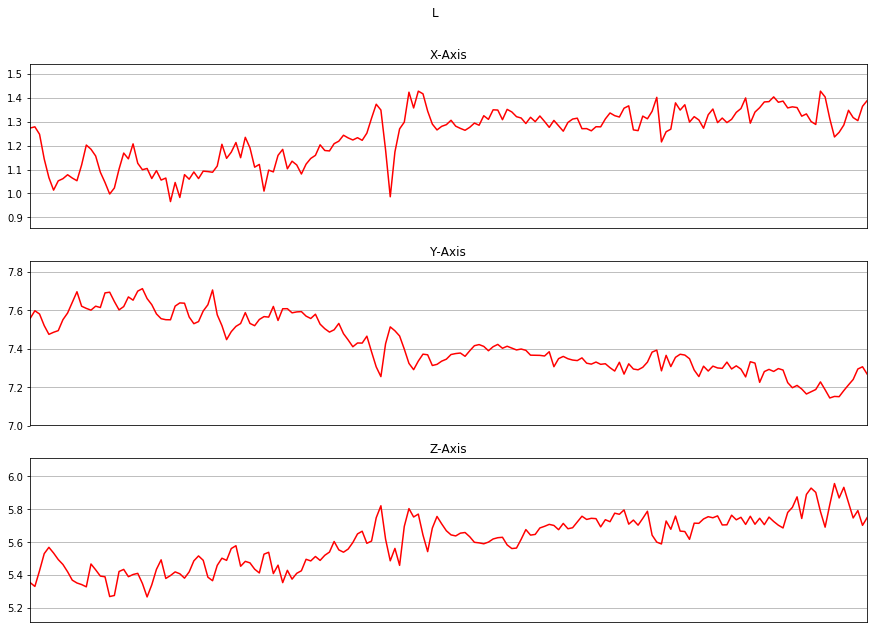

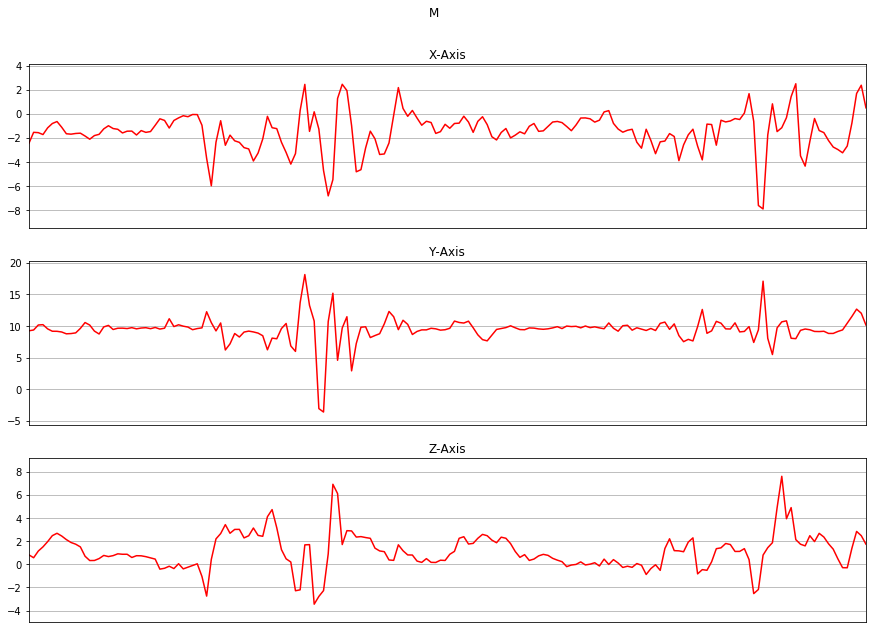

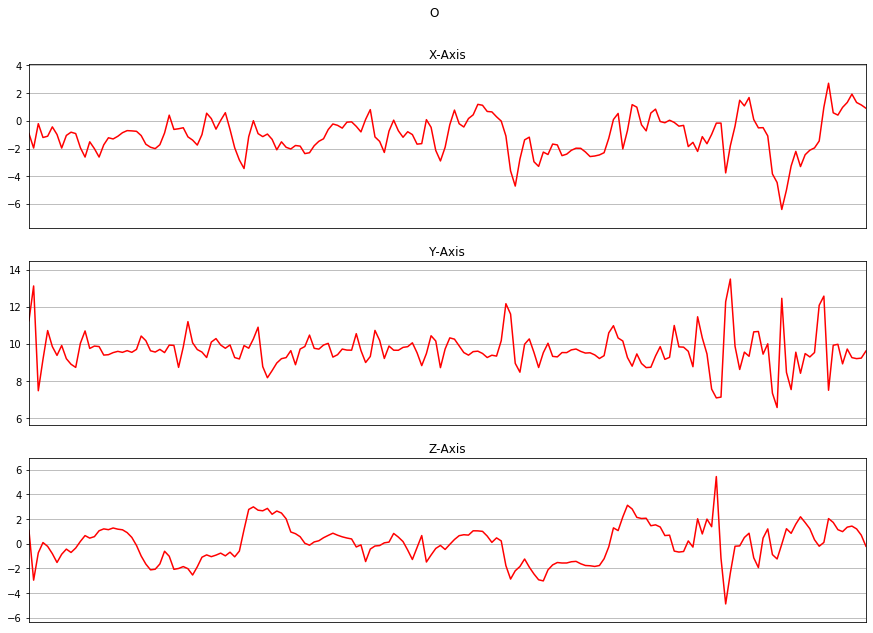

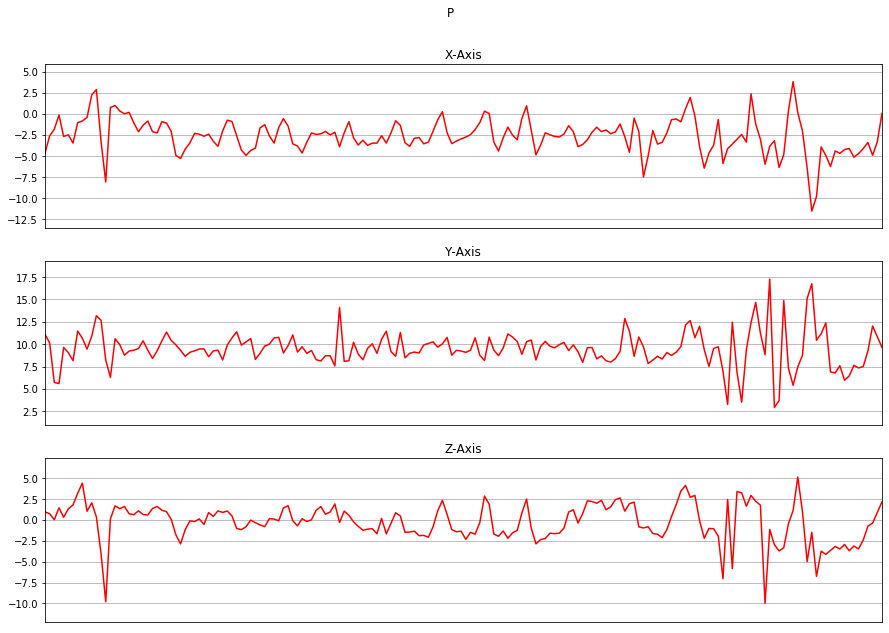

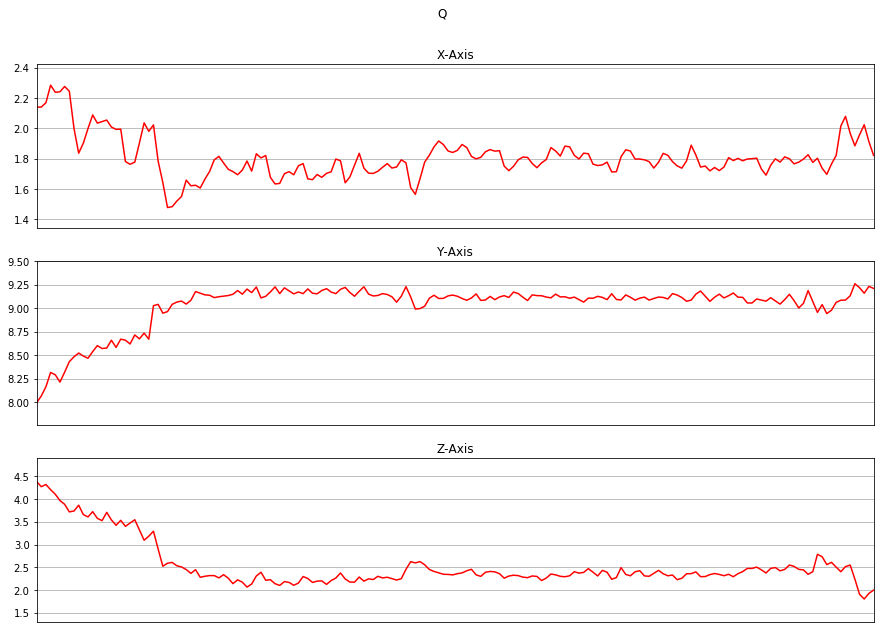

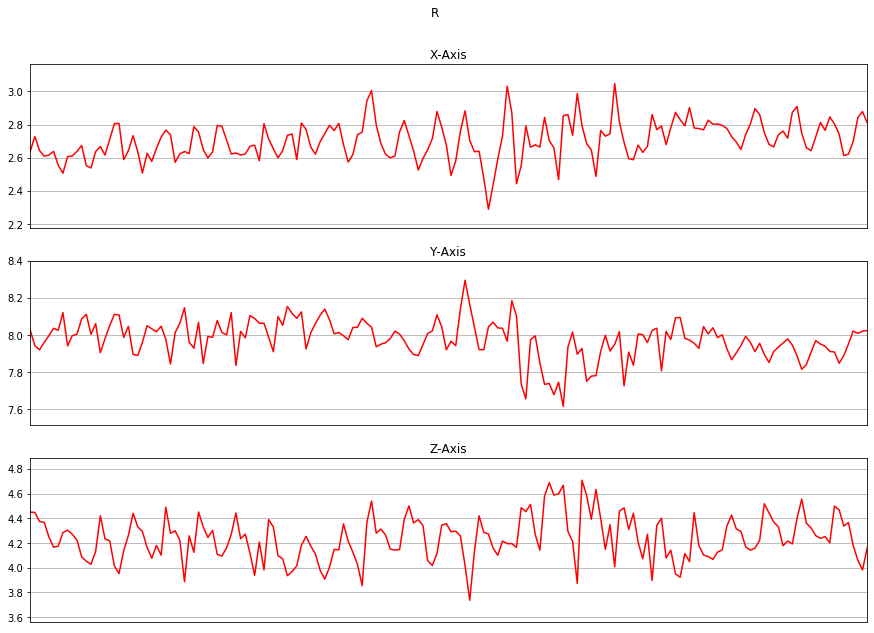

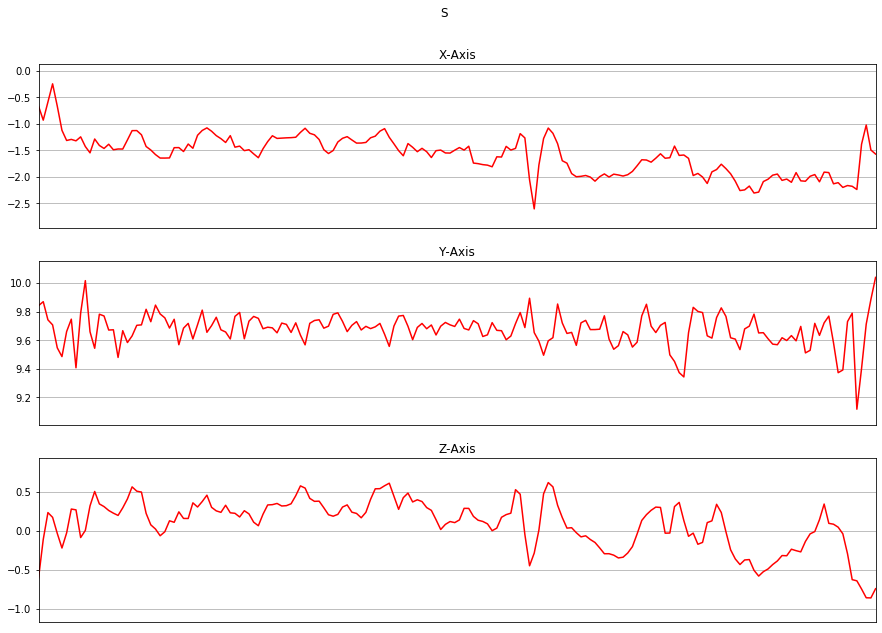

In [16]:
for activity in np.unique(data_accel['activity']):
    subset = data_accel[data_accel['activity'] == activity][:180]
    plot_activity(activity, subset)

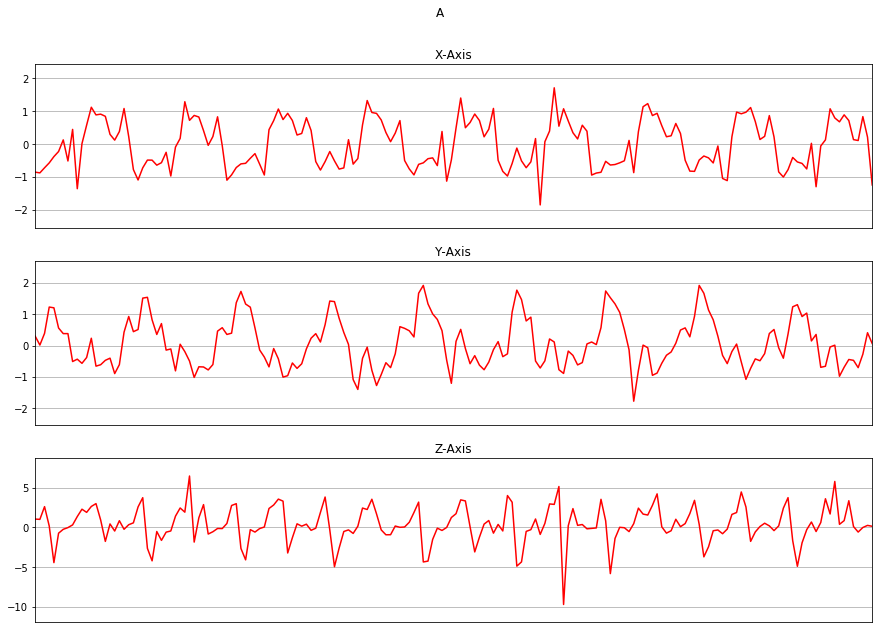

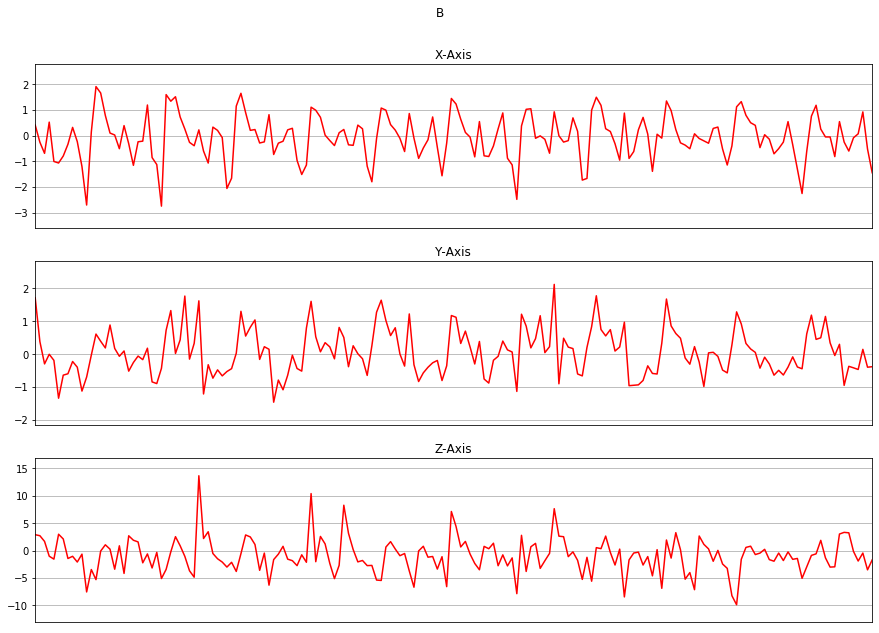

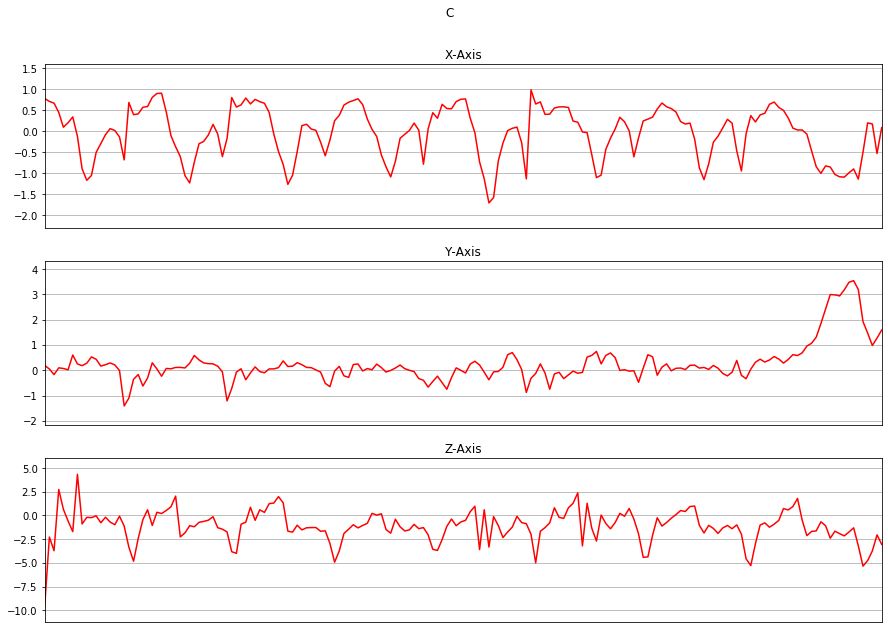

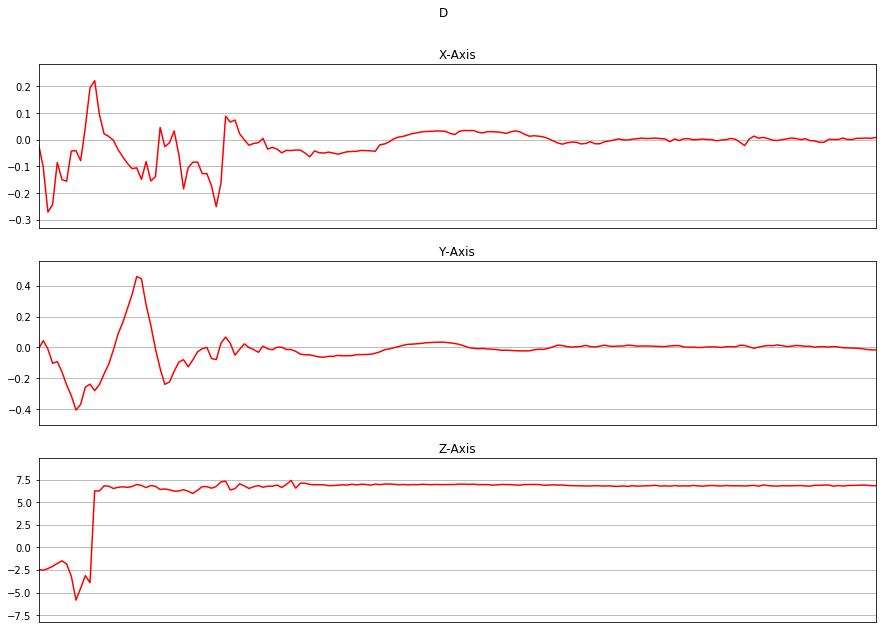

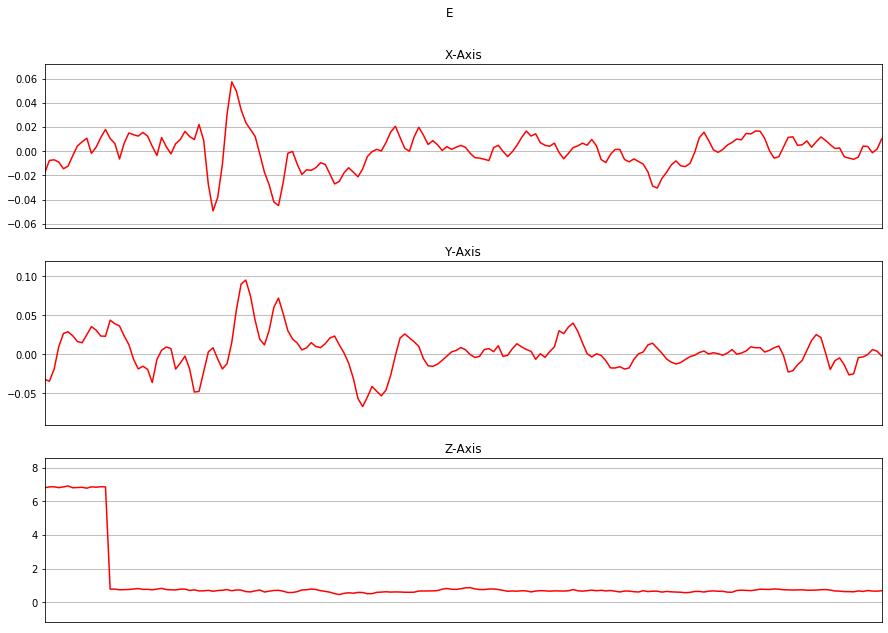

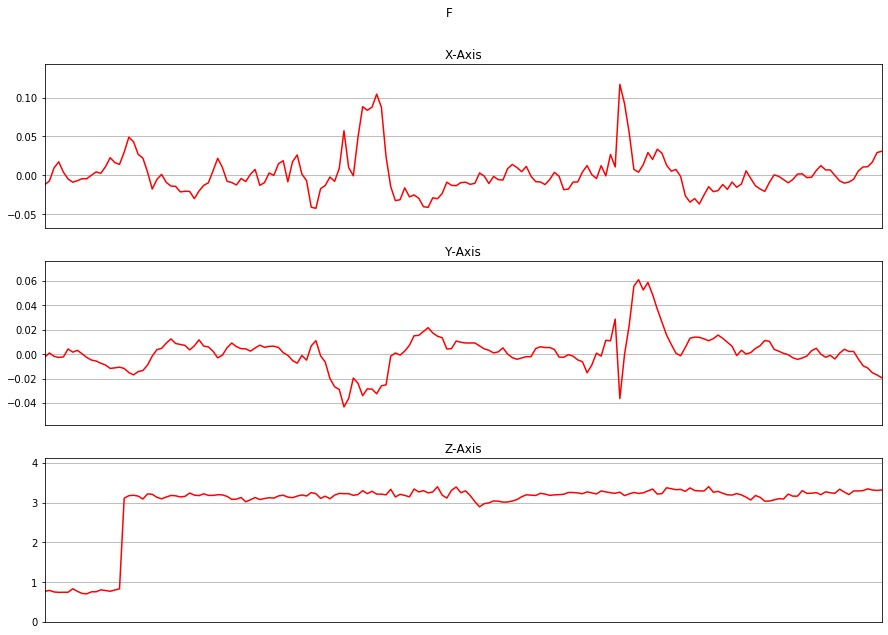

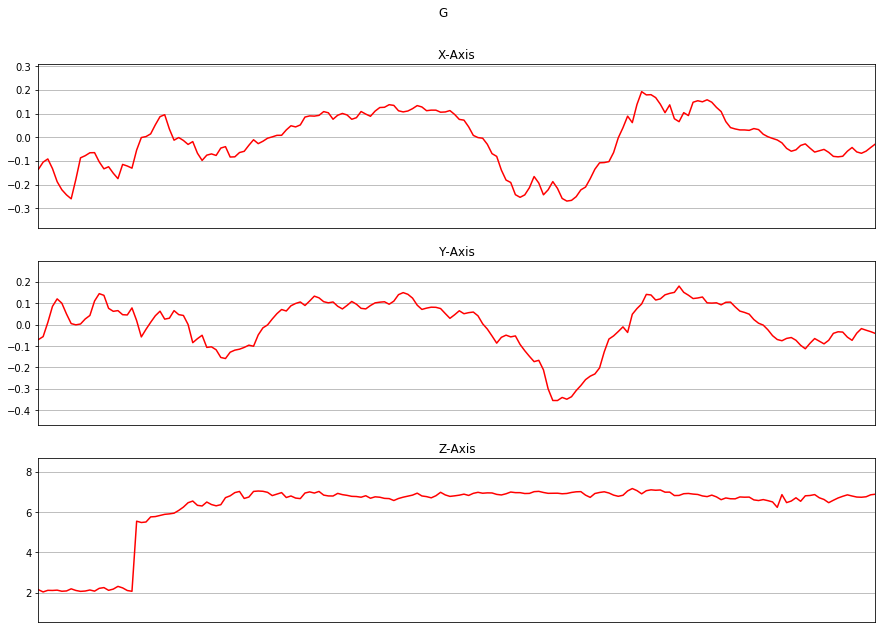

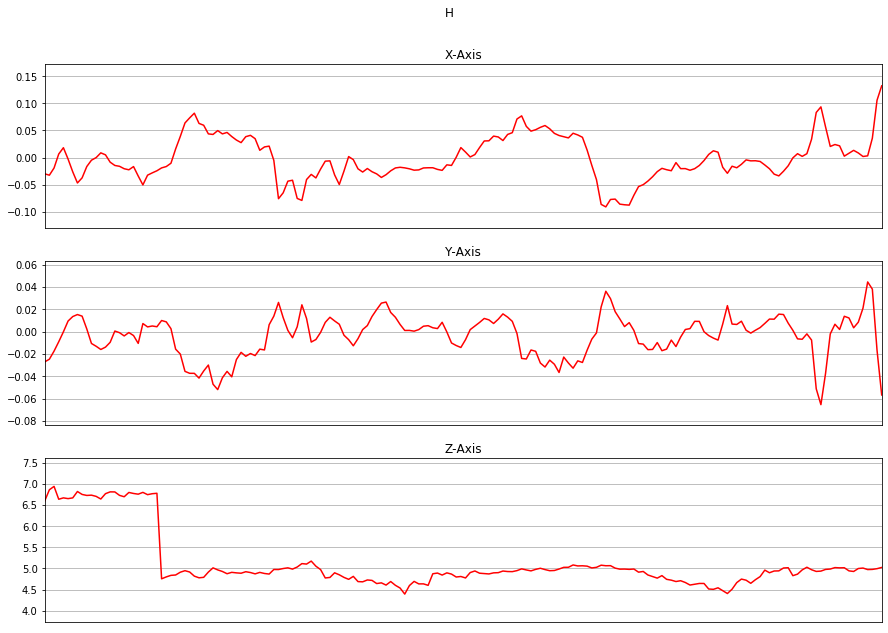

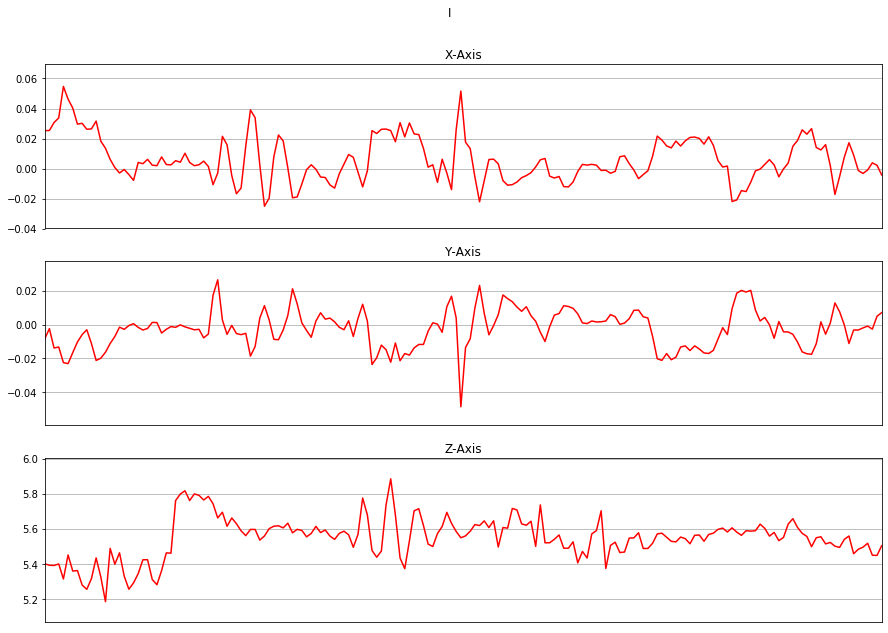

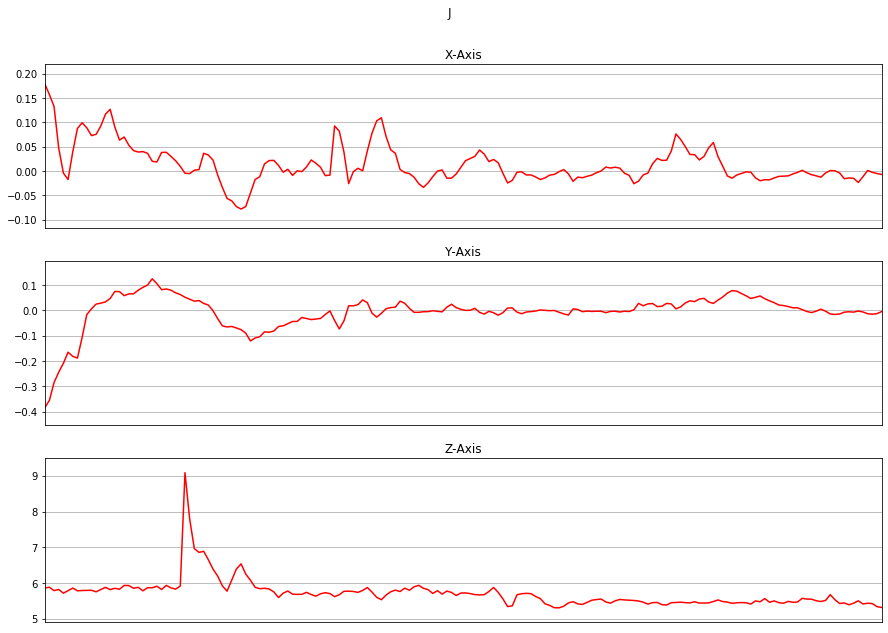

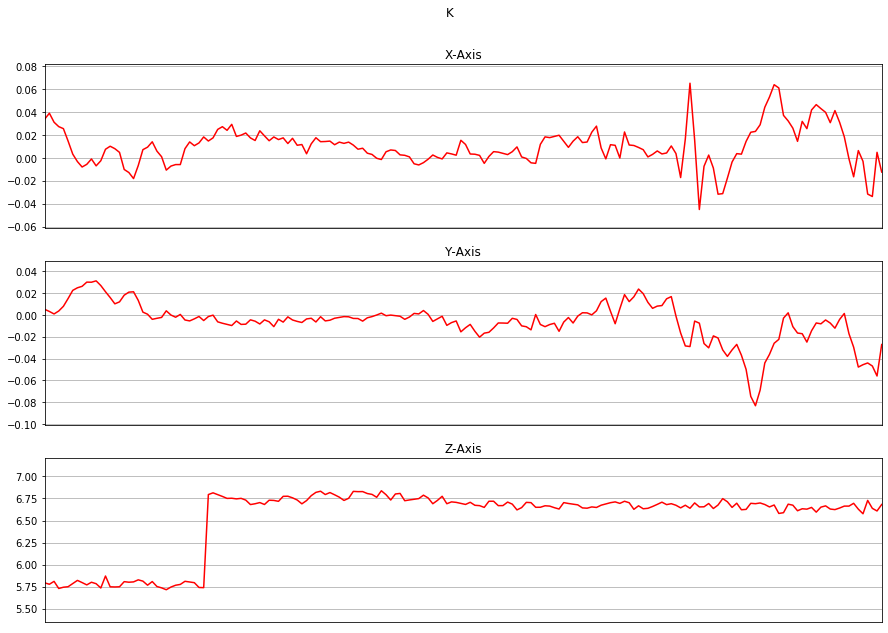

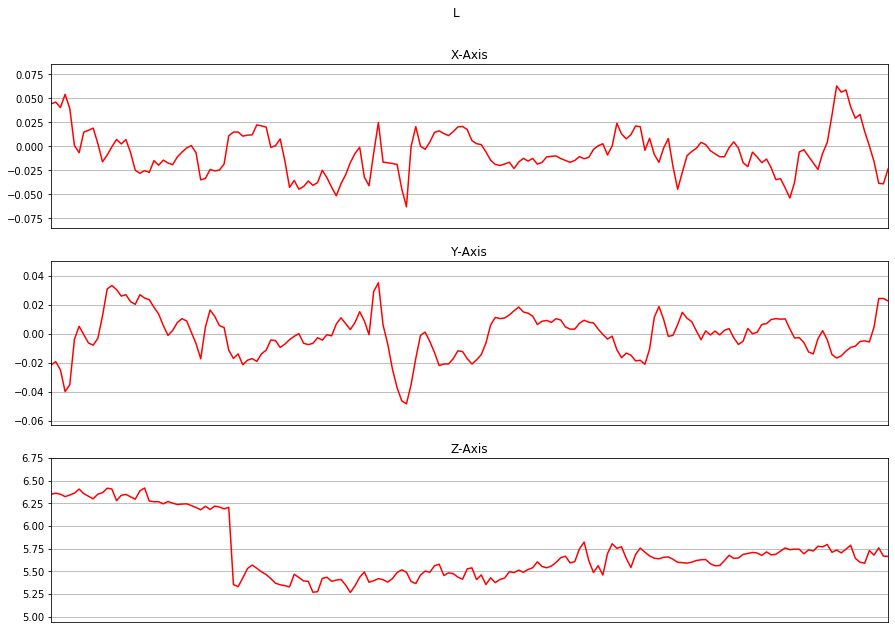

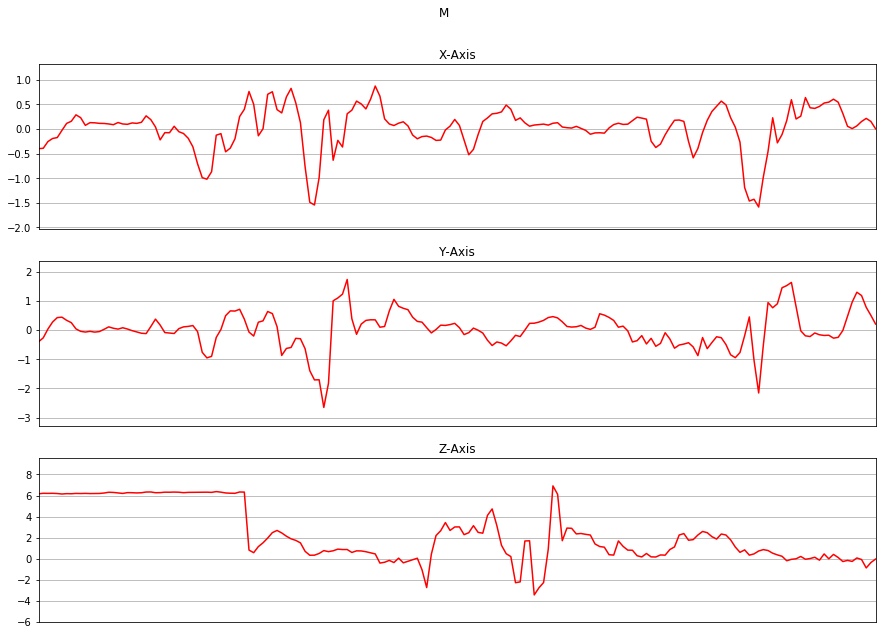

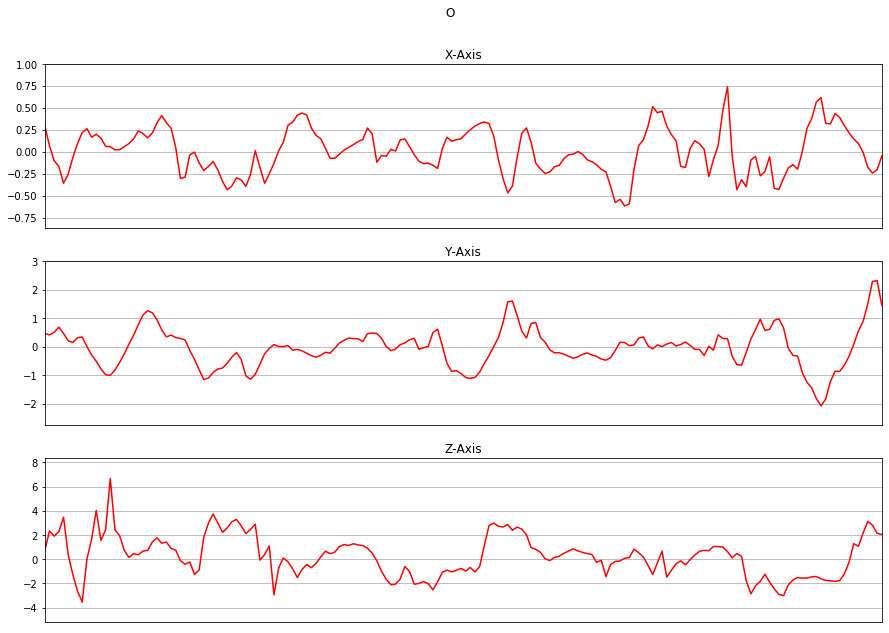

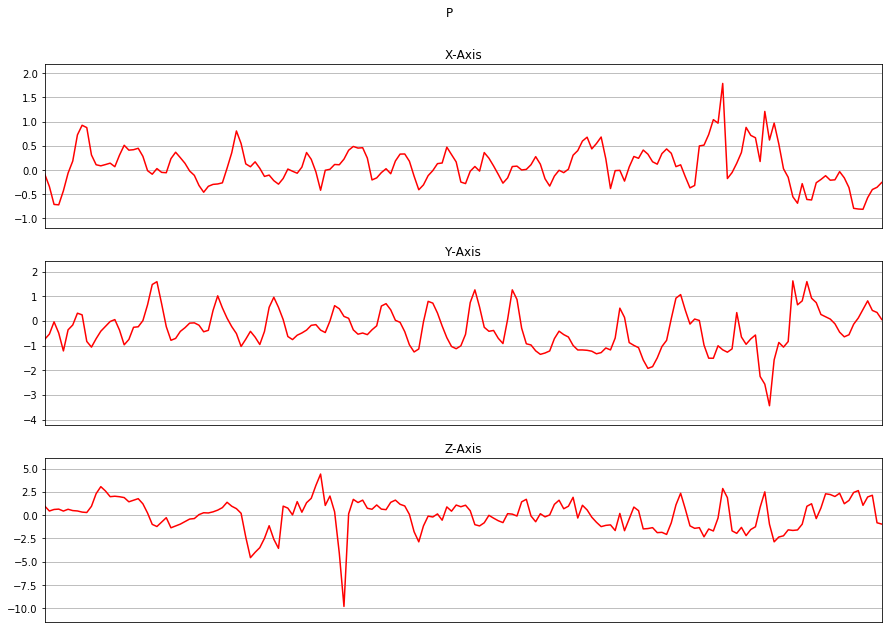

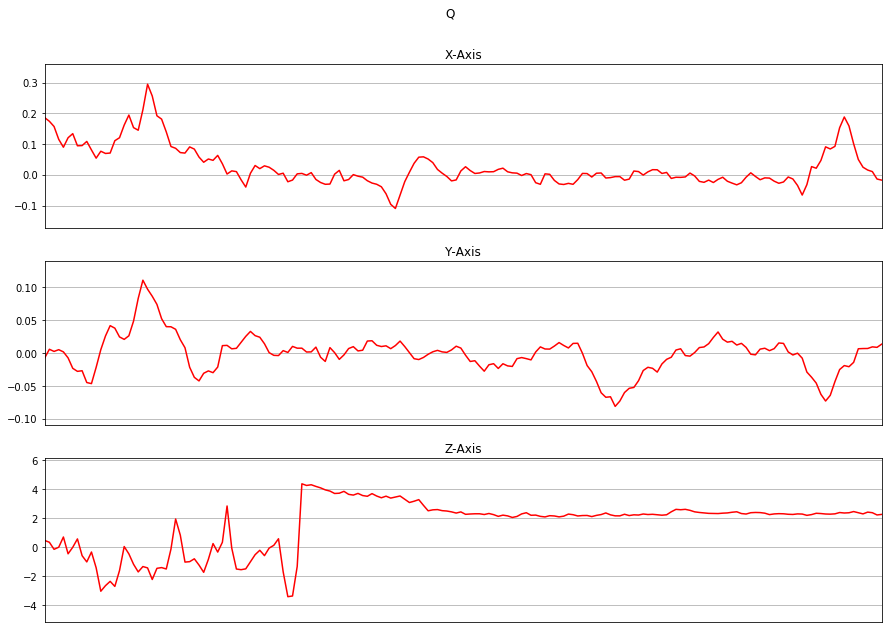

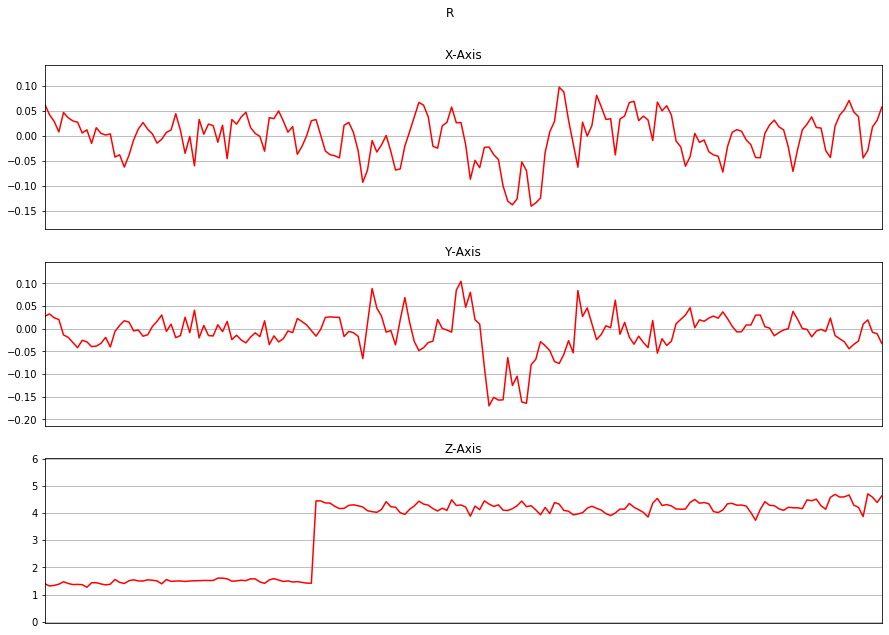

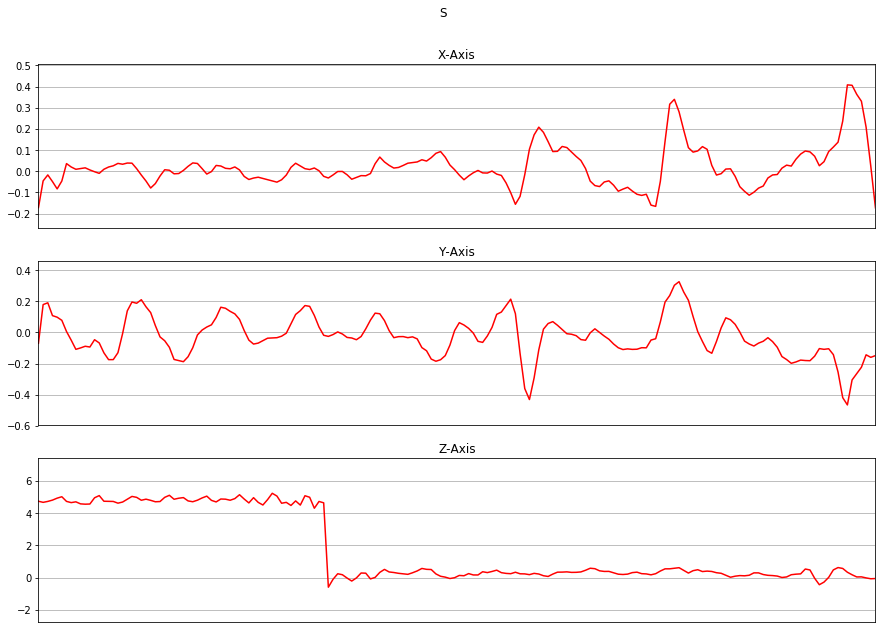

In [17]:
for activity in np.unique(data_gyro['activity']):
    subset = data_gyro[data_gyro['activity'] == activity][:180]
    plot_activity(activity, subset)

##### Feature engineering

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [19]:
le = preprocessing.LabelEncoder()
data_accel['activity'] = le.fit_transform(data_accel['activity'].values.ravel())

In [20]:
le = preprocessing.LabelEncoder()
data_gyro['activity'] = le.fit_transform(data_gyro['activity'].values.ravel())

In [21]:
data_accel.head()

,user-id,activity,timestamp,x-axis,y-axis,z-axis
0,1600,0,252207666810782,-0.364761,8.793503,1.055084
1,1600,0,252207717164786,-0.879730,9.768784,1.016998
2,1600,0,252207767518790,2.001495,11.109070,2.619156
3,1600,0,252207817872794,0.450623,12.651642,0.184555
4,1600,0,252207868226798,-2.164352,13.928436,-4.422485


In [22]:
data_gyro.tail()

,user-id,activity,timestamp,x-axis,y-axis,z-axis
3608630,1650,17,357733977635000,0.438889,0.171508,7.865244
3608631,1650,17,357734017925000,0.444215,0.158724,7.855664
3608632,1650,17,357734058325000,0.519849,0.037284,7.843689
3608633,1650,17,357734098619000,0.545415,-0.086286,7.860455
3608634,1650,17,357734138868000,0.471912,-0.201335,7.836505


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics                                       
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:
data_accel.dtypes

user-id        int64
activity       int32
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

In [25]:
data_gyro.dtypes

user-id        int64
activity       int32
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

In [26]:
accel_X=data_accel.drop(["user-id","activity"],axis=1)
accel_y=data_accel.activity

In [27]:
gyro_X=data_gyro.drop(["user-id","activity"],axis=1)
gyro_y=data_gyro.activity

In [33]:
from sklearn import model_selection

##### Splitting accel sensor data in train and test

In [34]:
accel_X_train, accel_X_test, accel_y_train,accel_y_test = model_selection.train_test_split(accel_X, accel_y, test_size=0.3, random_state=42)
print(accel_X_train.shape,accel_X_test.shape, accel_y_train.shape, accel_y_test.shape) 

(3363082, 4) (1441321, 4) (3363082,) (1441321,)


##### Applying Decision Tree on accel data

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf_accel= DecisionTreeClassifier(random_state=0)
clf_accel.fit(accel_X_train,accel_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [36]:
pred_accel=clf_accel.predict(accel_X_test)
accuracy_score(accel_y_test, pred_accel)

0.9920461854090796

In [49]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(12, 12))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

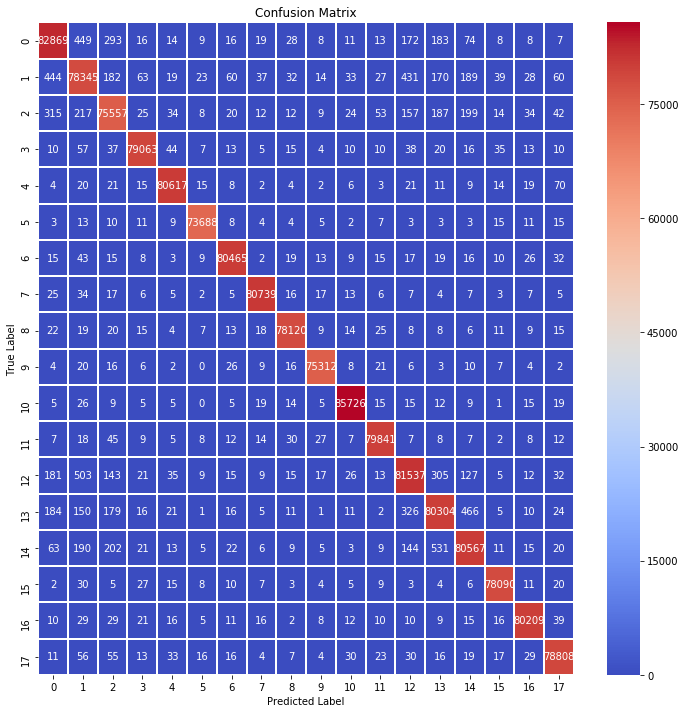

In [50]:
show_confusion_matrix(accel_y_test, pred_accel)

##### Splitting gyro sensor data in train and test

In [37]:
gyro_X_train, gyro_X_test, gyro_y_train,gyro_y_test = model_selection.train_test_split(gyro_X, gyro_y, test_size=0.3, random_state=42)
print(gyro_X_train.shape,gyro_X_test.shape, gyro_y_train.shape, gyro_y_test.shape) 

(2526044, 4) (1082591, 4) (2526044,) (1082591,)


##### Applying Decision Treee on Gyr sensor data

In [38]:
clf_gyro= DecisionTreeClassifier(random_state=0)
clf_gyro.fit(gyro_X_train,gyro_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [40]:
pred_gyro=clf_gyro.predict(gyro_X_test)
accuracy_score(pred_gyro, gyro_y_test)

0.9805974740229689

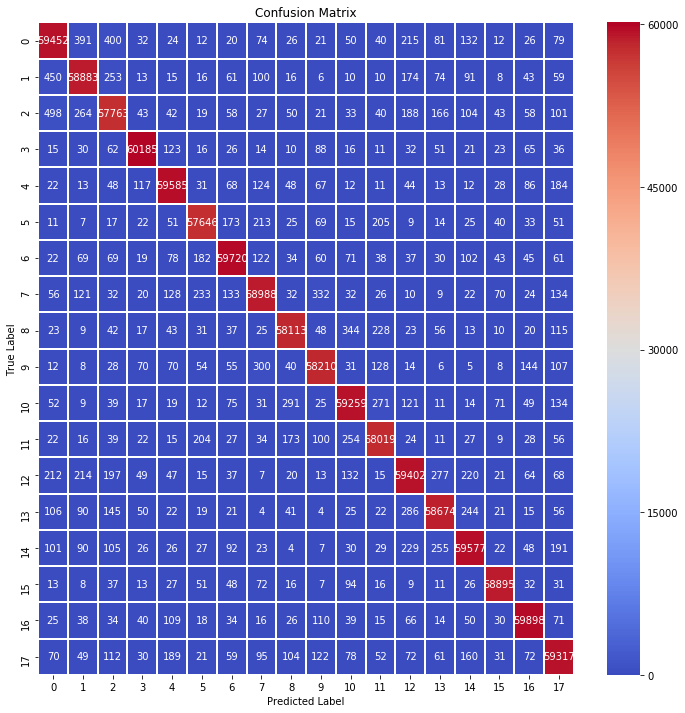

In [51]:
show_confusion_matrix(gyro_y_test, pred_gyro)